In [7]:
import json
import urllib3
import time
import urllib.request
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.frameon'] = True

#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 50)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('deep')
import warnings
warnings.filterwarnings('ignore')

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


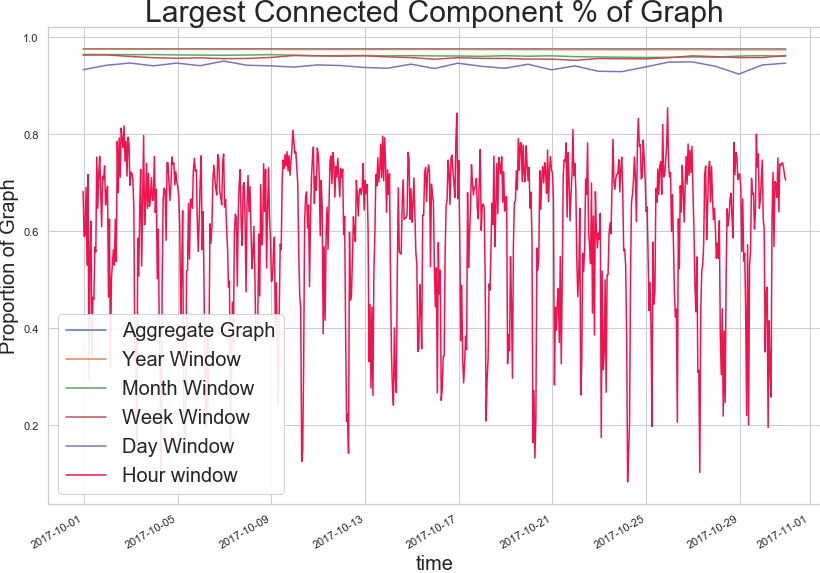

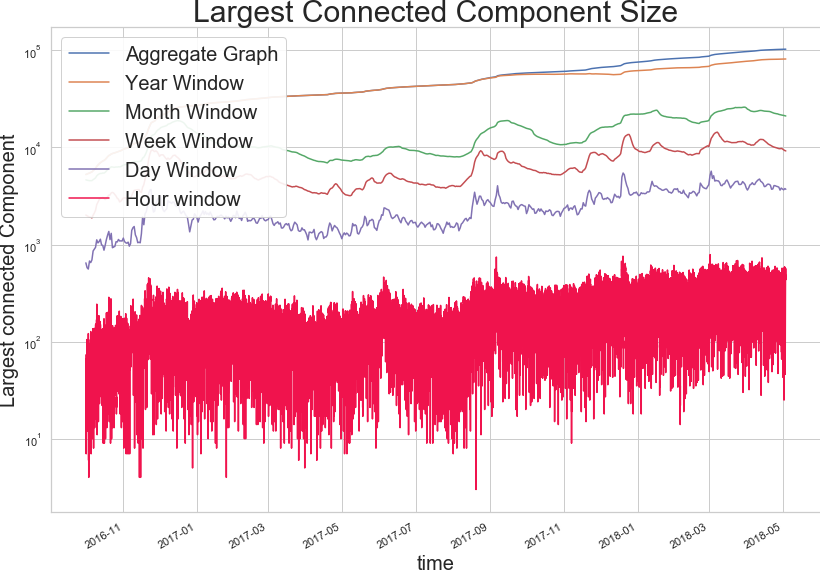

In [41]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def fullPlot(toPlot,title,x,y,scale,start,end):
    windows = [31536000000,2592000000,604800000,86400000]
    labels = ['Year Window','Month Window','Week Window','Day Window']
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title,fontsize=30)
    plt.xlabel(x,fontsize=20)
    plt.ylabel(y,fontsize=20)
    ax.set_yscale(scale)

    with open('CC/nowindow.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['mean'] = x[toPlot].rolling(window=4,center=False).mean()
        x.plot(x='time', y=toPlot,ax=ax, label="Aggregate Graph")

    with open('CC/bigCC.json') as json_file:
        cc1 = json.load(json_file)
        cc1= pd.DataFrame(cc1['views'])
        cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1['index'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1.set_index('index', inplace=True)
        cc1=cc1[start:end]
        cc1 = cc1[cc1[toPlot] != 0]
        index = 0
        for i in windows:
            y = cc1[cc1['windowsize'] == i]
            y['mean'] = y[toPlot].rolling(window=4,center=False).mean()
            hours = str(int((i/3600000)))+" hour window"
            y.plot(x='time', y=toPlot,ax=ax, label=labels[index])
            index +=1

    with open('CC/cc1hour.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['hour'] = x.apply(lambda row: int(row['time'].hour),axis=1)
        #x = x[x['hour'].isin([4,16])]
        x.plot(x='time', y=toPlot,ax=ax, color="#f0134d", label="Hour window")
    ax.legend(fontsize=20,framealpha=0.9)
    plt.tight_layout()
    plt.savefig("Graphs/"+toPlot+".png")
    plt.show()

#x['mean'] = x[toPlot].rolling(window=24,center=False).mean()
#[0,4,8,12,16,20,24]
#'2016-07-01': '2018-05-03'
fullPlot('proportion','Largest Connected Component % of Graph','Date','Proportion of Graph','linear','2017-09-30 23:00:00','2017-10-30')

fullPlot('biggest','Largest Connected Component Size','Date','Largest connected Component','log','2016-09-30 23:00:00','2018-10-30')

#fullPlot('totalWithoutIslands','Total Connected Components','Date','Total Connected Components','linear')

#fullPlot('clustersGT2','Total Connected Components with a size > 2','Date','Total Connected Components with size > 2','linear')


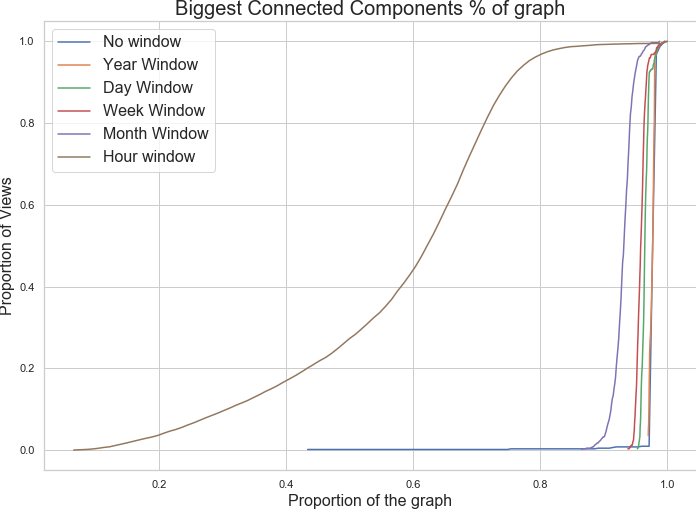

In [8]:
def fullPlot(toPlot,title,x,y,scale,start,end):
    num_bins = 100
    windows = [31536000000,2592000000,604800000,86400000]
    labels = ["Year Window",'Day Window','Week Window','Month Window']
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title,fontsize=20)
    plt.xlabel(x,fontsize=16)
    plt.ylabel(y,fontsize=16)
    ax.set_yscale(scale)

    with open('CC/nowindow.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['mean'] = x[toPlot].rolling(window=4,center=False).mean()
        counts, bin_edges = np.histogram (x[toPlot], bins=num_bins, normed=True)
        cdf = np.cumsum (counts)
        l,=plt.plot (bin_edges[1:], cdf/cdf[-1])
        l.set_label("No window")

    with open('CC/bigCC.json') as json_file:
        cc1 = json.load(json_file)
        cc1= pd.DataFrame(cc1['views'])
        cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1['index'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1.set_index('index', inplace=True)
        cc1=cc1[start:end]
        cc1 = cc1[cc1[toPlot] != 0]
        index = 0
        for i in windows:
            y = cc1[cc1['windowsize'] == i]
            y['mean'] = y[toPlot].rolling(window=4,center=False).mean()
            hours = str(int((i/3600000)))+" hour window"
            counts, bin_edges = np.histogram (y[toPlot], bins=num_bins, normed=True)
            cdf = np.cumsum (counts)
            l,=plt.plot (bin_edges[1:], cdf/cdf[-1])
            l.set_label(labels[index])
            index +=1

    with open('CC/cc1hour.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x['total'] != 0]
        x['hour'] = x.apply(lambda row: int(row['time'].hour),axis=1)
        counts, bin_edges = np.histogram (x[toPlot], bins=num_bins, normed=True)
        cdf = np.cumsum (counts)
        plt.plot(bin_edges[1:], cdf/cdf[-1],label="Hour window")
        #x.plot(x='time', y=toPlot,ax=ax, color="#f0134d",)
    ax.legend(fontsize=16)
    plt.show()



fullPlot('proportion','Biggest Connected Components % of graph','Proportion of the graph','Proportion of Views','linear','2016-07-01', '2018-05-03')


        



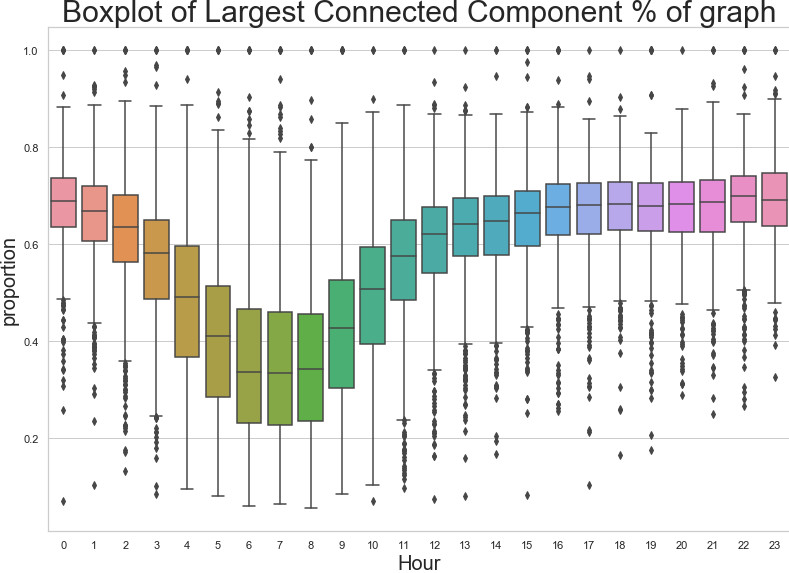

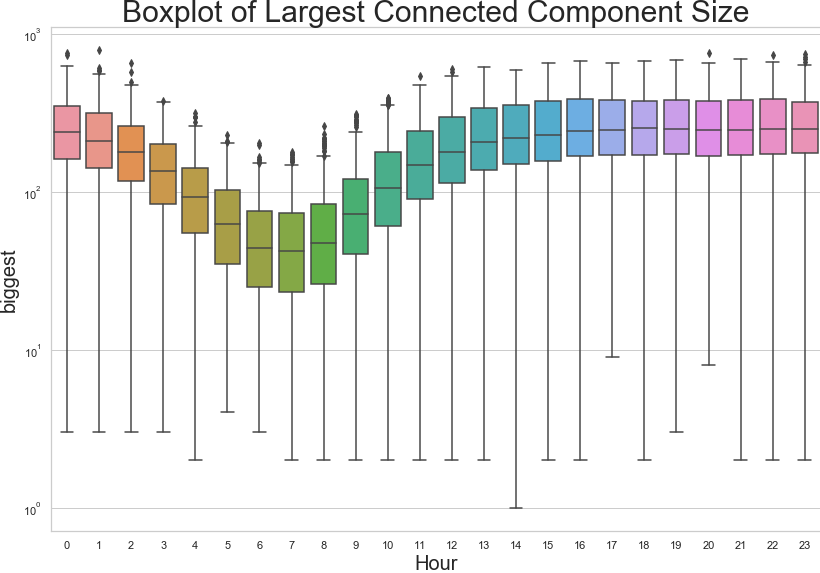

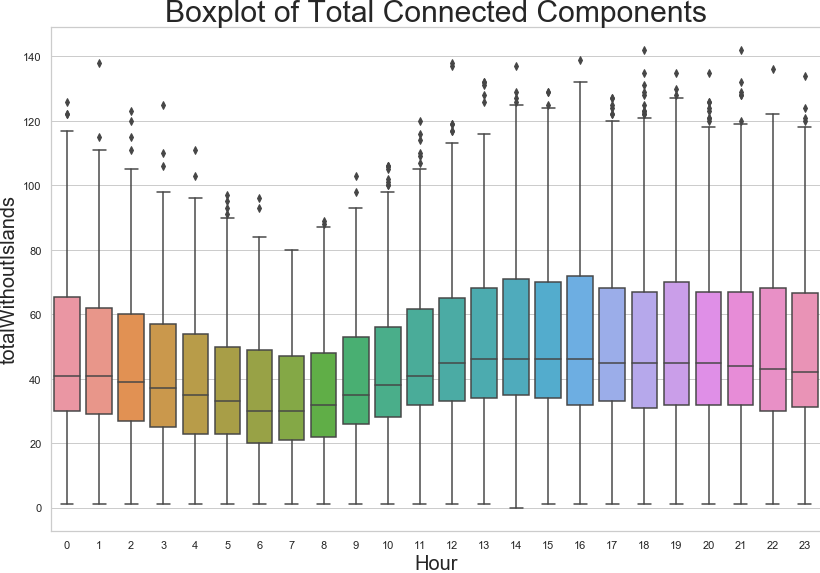

In [45]:
def diurnal_plot(toPlot, title, x, y, scale):
    windows = [31536000000,2592000000,604800000,86400000]
    start = 1483228800000
    no_weeks = 10
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(1,1,figsize=a4_dims)
    #ax[0].set_title(title,fontsize=20)
    ax.set_title("Boxplot of "+title,fontsize=30)
    #ax[0].set_xlabel(x,fontsize=20)
    ax.set_xlabel(x,fontsize=20)
    #ax[0].set_ylabel(y,fontsize=20)
    ax.set_ylabel(y,fontsize=20)
    #ax[0].set_yscale(scale)
    ax.set_yscale(scale)
    
    dfs = {}
    
    with open('CC/cc1hour.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x = x.set_index('time')
        x['Weekday Name'] = x.index.weekday_name
        x['Hour'] = x.index.hour
    #print(x.dtypes)
        x = x[x['total'] != 0]
        means = x.groupby(x.index.hour).mean()
        sds = x.groupby(x.index.hour).std()
        #ax[0].plot(means['Hour'],means[toPlot])
        #ax[0].fill_between(means['Hour'], means[toPlot]-sds[toPlot]/2.0, means[toPlot]+sds[toPlot]/2.0, alpha=0.3)
        
        ax=sns.boxplot(data=x, x='Hour', y=toPlot)
        plt.tight_layout()
        plt.savefig("Graphs/"+y.replace(" ","_")+".png")
        plt.show()
        
diurnal_plot('proportion','Largest Connected Component % of graph','Hour','Proportion of Graph','linear')
diurnal_plot('biggest','Largest Connected Component Size','Hour','Largest connected Component','log')
diurnal_plot('totalWithoutIslands','Total Connected Components','Hour','Total Connected Components','linear')

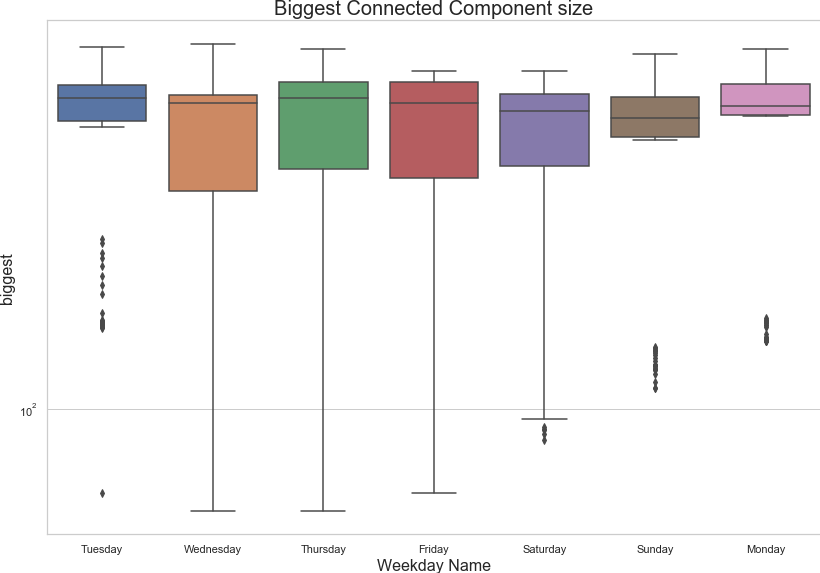

In [7]:
def weekly_plot(toPlot, title, x, y, scale):
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title,fontsize=20)
    plt.xlabel(x,fontsize=16)
    plt.ylabel(y,fontsize=16)
    ax.set_yscale(scale)
    
    daywindow=86400000
    
    with open('CC/cc.json') as json_file:
        cc1 = json.load(json_file)
        json_file.close()
        
    cc1= pd.DataFrame(cc1['views'])
    cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
    cc1 = cc1[cc1['total'] != 0]
    data = cc1[cc1['windowsize'] == daywindow]
    data = data.set_index('time')
    data['Weekday Name'] = data.index.weekday_name
    data = data[data['total']!=0]
    means = data.groupby(data.index.weekday_name).mean()
    sds = data.groupby(data.index.weekday_name).std()     

    ax=sns.boxplot(data=data, x='Weekday Name', y=toPlot)
    #ax.fill_between(means.index, means[toPlot]-sds[toPlot]/2.0, means[toPlot]+sds[toPlot]/2.0, alpha=0.3)
    
    #plt.legend(loc = 'lower left')
    plt.tight_layout()
    plt.savefig("Graphs/Weekday_"+y.replace(" ","_")+".png")
    plt.show()
    
#weekly_plot('proportion','Biggest Connected Components % of graph','Weekday Name','Proportion of Graph','linear')

weekly_plot('biggest','Biggest Connected Component size','Weekday Name','Largest connected Component','log')

#weekly_plot('totalWithoutIslands','Total Connected Components','Weekday Name','Total Connected Components','linear') 

In [15]:
def jaccard_similarity(list1, list2):
    list1, list2 = set(list1), set(list2)
    min_length = min(len(list1),len(list2))
    intersection_size = len(list1.intersection(list2))
    union_size=len(list1)+len(list2)-intersection_size
    if union_size==0:
        return 0.0
    else: return intersection_size/union_size
    
def rank_similarity(list1, list2):
    min_length = min(len(list1), len(list2))
    sames = sum([list1[i]==list2[i] for i in range(min_length)])
    return sames/min_length
    
print(rank_similarity([1,2,3],[1,3,2]))

0.3333333333333333


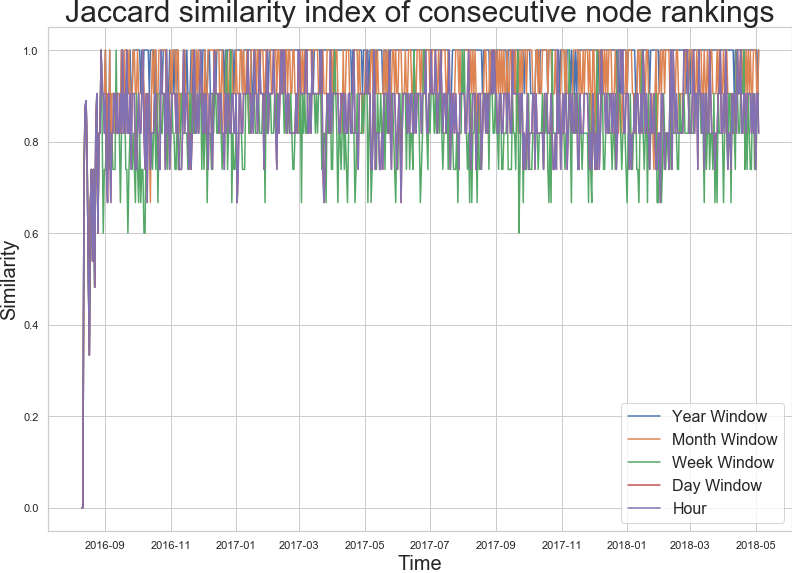

In [46]:
def rank_jaccard_plot(x, y, title, scale):
    windows = [31536000000,2592000000,604800000,864000000]
    labels = ['Year Window','Month Window','Week Window','Day Window']
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title, size=30)
    plt.xlabel(x, size=20)
    plt.ylabel(y, size=20)
    ax.set_yscale(scale)
    
    with open('degree/degreewindows.json') as json_file:
        degs = json.load(json_file)
        json_file.close()
    degs = pd.DataFrame(degs['views'])
    degs['time'] = pd.to_datetime(degs['time'],unit='ms')
    degs['index'] = pd.to_datetime(degs['time'],unit='ms')
    degs.set_index('index', inplace=True)
    
    index = 0
    for i in windows:
        y = degs[degs['windowsize'] == i]
        y['topusers']= [[] for j in range(len(y))]
        for j in range(len(y)):
            if len(y['bestusers'][j])>0:
                y['topusers'][j]=pd.DataFrame(y['bestusers'][j])['id']
        
        y['jaccard']= [0.0 for j in range(len(y))]
        y['jaccard'][1:] = [jaccard_similarity(y['topusers'][j], y['topusers'][j-1]) for j in range(1,len(y))]
        
        ax.plot(y['time'],y['jaccard'], label=labels[index])
        index +=1

    #Do the hours window
    with open('degree/degreehours.json') as json_file:
        degs = json.load(json_file)
        json_file.close()
    degs = pd.DataFrame(degs['views'])
    degs['time'] = pd.to_datetime(degs['time'],unit='ms')
    degs['index'] = pd.to_datetime(degs['time'],unit='ms')
    degs.set_index('index', inplace=True)
    
    for j in range(len(y)):
        if len(y['bestusers'][j])>0:
            y['topusers'][j]=pd.DataFrame(y['bestusers'][j])['id']
        y['jaccard']= [0.0 for j in range(len(y))]
        y['jaccard'][1:] = [jaccard_similarity(y['topusers'][j], y['topusers'][j-1]) for j in range(1,len(y))]
        
    ax.plot(y['time'],y['jaccard'], label= 'Hour')

    plt.legend(fontsize=16)
    plt.tight_layout()
    plt.savefig('graphs/JaccardSimilarity.png')
    plt.show()
    
rank_jaccard_plot("Time", "Similarity", "Jaccard similarity index of consecutive node rankings", 'linear')

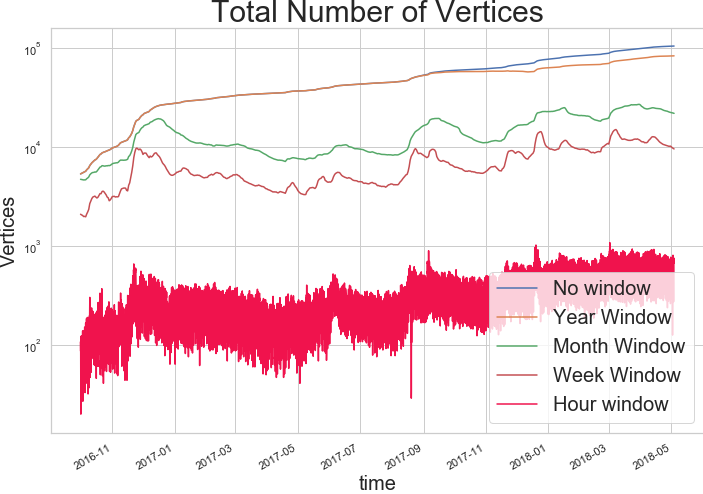

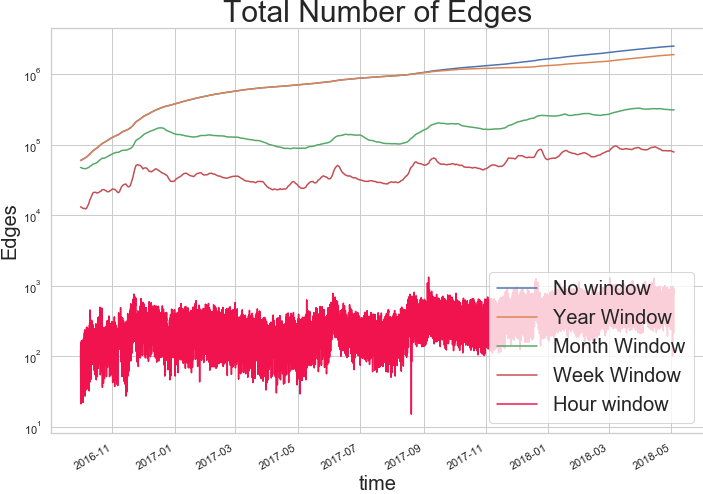

In [48]:
def fullPlot(toPlot,title,x,y,scale,start,end):
    windows = [31536000000,2592000000,604800000]
    labels = ['Year Window','Month Window','Week Window','Day Window']
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title(title,fontsize=30)
    plt.xlabel(x,fontsize=20)
    plt.ylabel(y,fontsize=20)
    ax.set_yscale(scale)

    with open('degree/degrees.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x = x[x[toPlot] != 0]
        x.plot(x='time', y=toPlot,ax=ax, label="No window")

    with open('degree/degreewindows.json') as json_file:
        cc1 = json.load(json_file)
        cc1= pd.DataFrame(cc1['views'])
        cc1['time'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1['index'] = pd.to_datetime(cc1['time'],unit='ms')
        cc1.set_index('index', inplace=True)
        cc1=cc1[start:end]
        index = 0
        for i in windows:
            y = cc1[cc1['windowsize'] == i]
            #y = y[y[toPlot] != 0]
            y.plot(x='time', y=toPlot,ax=ax, label=labels[index])
            index +=1

    with open('degree/degreehours.json') as json_file:
        x = json.load(json_file)
        x= pd.DataFrame(x['views'])
        x['index'] = pd.to_datetime(x['time'],unit='ms')
        x['time'] = pd.to_datetime(x['time'],unit='ms')
        x.set_index('index', inplace=True)
        x =x[start:end]
        x['hour'] = x.apply(lambda row: int(row['time'].hour),axis=1)
        x = x[x[toPlot] != 0]
        x.plot(x='time', y=toPlot,ax=ax, color="#f0134d", label="Hour window")
        
    #plt.axvline('2016-11-09',linestyle='')
    #plt.axvline('2017-08-11')
    #plt.axvline('2017-08-13')
    plt.legend(fontsize=20, loc='lower right')
    plt.show()

#x['mean'] = x[toPlot].rolling(window=24,center=False).mean()
#[0,4,8,12,16,20,24]
#'2016-07-01': '2018-05-03'
fullPlot('vertices','Total Number of Vertices','Date','Vertices','log','2016-09-30 23:00:00','2018-10-30')
fullPlot('edges', 'Total Number of Edges', 'Date', 'Edges', 'log','2016-09-30 23:00:00','2018-10-30')

#fullPlot('biggest','Biggest Connected Component size','Date','Largest connected Component','log','2016-09-30 23:00:00','2018-10-30')

#fullPlot('totalWithoutIslands','Total Connected Components','Date','Total Connected Components','linear')

#fullPlot('clustersGT2','Total Connected Components with a size > 2','Date','Total Connected Components with size > 2','linear')


# OLD STUFF

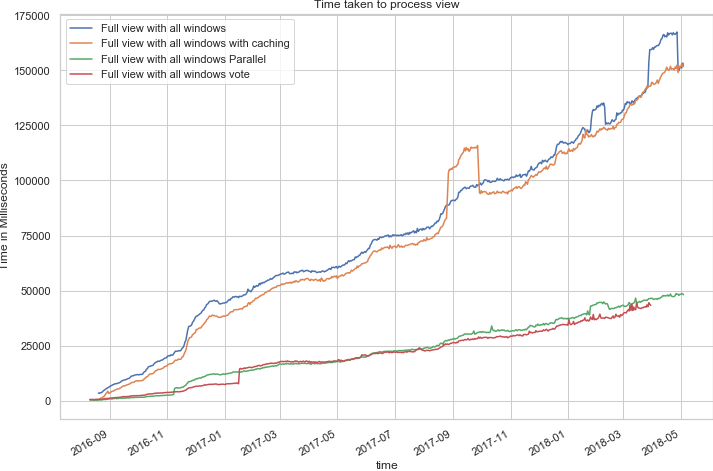

In [38]:



windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Biggest Connected Components % of graph')
    plt.xlabel('Date')
    plt.ylabel('Proportion of Graph')
    for i in windows:
        y = x[x['windowsize'] == i]
        y['mean'] = y['proportion'].rolling(window=4,center=False).mean()
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='mean',ax=ax, label=hours)
    plt.show()





windows = [31536000000,2592000000,604800000,86400000]
y=0
x=0
z=0
a=0
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    
with open('bigCC2.json') as json_file:
    y = json.load(json_file)
    y= pd.DataFrame(y['views'])
    y['time'] = pd.to_datetime(y['time'],unit='ms')
    y = y[y['total'] != 0]
    
with open('bigCC3.json') as json_file:
    z = json.load(json_file)
    z = pd.DataFrame(z['views'])
    z['time'] = pd.to_datetime(z['time'],unit='ms')
    z = z[z['total'] != 0]
    
with open('bigCC4.json') as json_file:
    a = json.load(json_file)
    a = pd.DataFrame(a['views'])
    a['time'] = pd.to_datetime(z['time'],unit='ms')
    a = a[a['total'] != 0]
    

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Time taken to process view')
plt.xlabel('Date')
plt.ylabel('Time in Milliseconds')
x.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows")
y.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows with caching")
z.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows Parallel")
a.plot(x='time', y='viewTime',ax=ax, label="Full view with all windows vote")


plt.show()